# Engine's Datasets Structure Definition

The Prognostics Data Repository (https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/) is a collection of data sets that have been donated by various universities, agencies, or companies. The data repository focuses exclusively on prognostic data sets, i.e., data sets that can be used for development of prognostic algorithms.

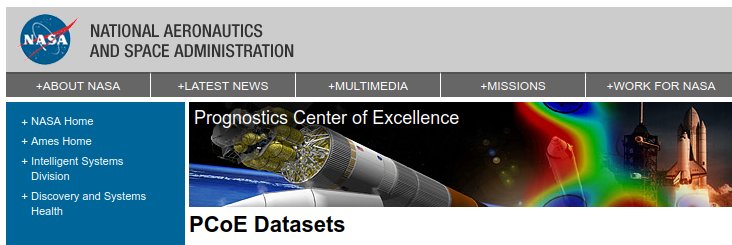

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

from IPython.display import Image
Image("/home/dsc/Downloads/nasa.png")

### Datasets Instructions:

1. Data sets consists of multiple multivariate time series. 
2. Each data set is further divided into training and test subsets. 
3. Each time series is from a different engine, i.e., the data can be considered to be from a fleet of engines of the same type. 
4. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. 
5. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. 
6. The data is contaminated with sensor noise.
7. The engine is operating normally at the start of each time series, and develops a fault at some point during the series. 
8. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. 
9. The objective is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:

1. unit number
2. time, in cycles
3. operational setting 1
4. operational setting 2
5. operational setting 3
6. sensor measurement  1
7. sensor measurement  2

   ...
8. sensor measurement 26

### Objective
This notebook will provide the 12 different datasets with the required modifications to be able to analyse them independently, as it will be checked now, they come in a format to be improved

Taking as an example the training dataset of the first set of engines:

In [2]:
df_train_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD001.txt', sep=" ", header=None)
df_train_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [3]:
df_train_1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

It is checked that column names are not included. Using provided bibliography it is proceeded to change the column names to introduce the project features:
- First column refers to "ID", as it remains constant while the next one increases linearly. Hence, second column refers to the engine cycle
- Following 3 columns refer to the Operational Settings, and provide information regarding the flight conditions variations while the flight performance
- Last 23 columns it is understood that they refer to the different sensor measurements of the engine, which each one computes a different magnitude in a specific part of the engine. Image below shows an example of this distribution

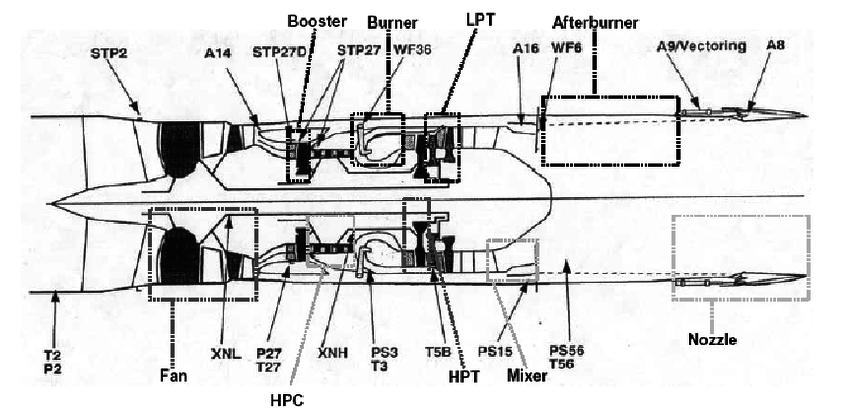

In [4]:
Image("/home/dsc/Downloads/turbofan.png")

To confirm this assumption, the test set of this engines' collection is also showed

It is, thus, proceeded to modify the feature names

In [5]:
df_test_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/test_FD001.txt', sep=" ", header=None)
df_test_1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

The rest of sets contained in this project come all in this format. It is proceeded then to modify the feature's names:

In [6]:
list_operational_settings = 3
operational_list = []
for n in range(1,list_operational_settings+1):
    operational = "operational_setting_" + str(n)
    operational_list.append(operational)
    
list_sensors = 23
sensor_measurement_list = []
for n in range(1,list_sensors+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)
    
df_train_1.columns = ["ID", "Cycle"] + operational_list + sensor_measurement_list
df_train_1

,ID,Cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [7]:
df_train_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD001.txt', sep=" ", header=None)
df_train_2 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD002.txt', sep=" ", header=None)
df_train_3 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD003.txt', sep=" ", header=None)
df_train_4 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD004.txt', sep=" ", header=None)

list_df = [df_train_1, df_train_2, df_train_3, df_train_4]

list_operational = 3
operational_list = []
for n in range(1,list_operational+1):
    operational = "operational_setting_" + str(n)
    operational_list.append(operational)

list_sensors = 23
sensor_measurement_list = []
for n in range(1,list_sensors+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)
    
new_list_df = []
for df in list_df:
    
    df.columns = ["ID", "Cycle"] + operational_list + sensor_measurement_list
    new_list_df.append(df)
    
df_train_1 = new_list_df[0]
df_train_2 = new_list_df[1]
df_train_3 = new_list_df[2]
df_train_4 = new_list_df[3]

Column now appear with correct names

In [8]:
df_train_1.columns

Index(['ID', 'Cycle', 'operational_setting_1', 'operational_setting_2',
       'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2',
       'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
       'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
       'sensor_measurement_9', 'sensor_measurement_10',
       'sensor_measurement_11', 'sensor_measurement_12',
       'sensor_measurement_13', 'sensor_measurement_14',
       'sensor_measurement_15', 'sensor_measurement_16',
       'sensor_measurement_17', 'sensor_measurement_18',
       'sensor_measurement_19', 'sensor_measurement_20',
       'sensor_measurement_21', 'sensor_measurement_22',
       'sensor_measurement_23'],
      dtype='object')

#### Test Sets
In the test set of these engine's collections it is confirmed as well this column terminology

In [9]:
df_test_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/test_FD001.txt', sep=" ", header=None)
df_test_2 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/test_FD002.txt', sep=" ", header=None)
df_test_3 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/test_FD003.txt', sep=" ", header=None)
df_test_4 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/test_FD004.txt', sep=" ", header=None)

df_test_1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

In [10]:
list_df_test = [df_test_1, df_test_2, df_test_3, df_test_4]

new_list_test = []
for df in list_df_test:
    
    df.columns = ["ID", "Cycle"] + operational_list + sensor_measurement_list
    new_list_test.append(df)
df_test_1 = new_list_test[0]
df_test_2 = new_list_test[1]
df_test_3 = new_list_test[2]
df_test_4 = new_list_test[3]

df_test_1.columns

Index(['ID', 'Cycle', 'operational_setting_1', 'operational_setting_2',
       'operational_setting_3', 'sensor_measurement_1', 'sensor_measurement_2',
       'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_5',
       'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
       'sensor_measurement_9', 'sensor_measurement_10',
       'sensor_measurement_11', 'sensor_measurement_12',
       'sensor_measurement_13', 'sensor_measurement_14',
       'sensor_measurement_15', 'sensor_measurement_16',
       'sensor_measurement_17', 'sensor_measurement_18',
       'sensor_measurement_19', 'sensor_measurement_20',
       'sensor_measurement_21', 'sensor_measurement_22',
       'sensor_measurement_23'],
      dtype='object')

As described in the available bibliography, the project's objective aims to determine the remaining useful life of these engines. We know the following:

1. Each engine has an increasing feature ("Cycle") which tells the flight performed by the engine
2. This features increases from 1 to a specific number (different for each engine) which tells the maximum cycle achieved by the engine
3. This maximum life provides the exact cycle when the engine will fail and stop performing
4. Knwowing this maximum life parameter and having already the current engine cycle, allows to determine, at each cycle, the remaiming number of cycles per engine until the failure is encountered, in other words, it provides the Remaining Useful Life

In [11]:
RUL_dfs = []

for df in new_list_df:

    max_cycle_value = df.groupby(["ID"])["Cycle"].max().reset_index()
    max_cycle_value = max_cycle_value.rename(columns={"Cycle":"Max_cycle"})
    df = df.merge(max_cycle_value, how="inner", on="ID")
    df["RUL"] = df["Max_cycle"] - df["Cycle"]
    df = df.drop(["Max_cycle"],axis=1)

    RUL_dfs.append(df)
    
df_train_1 = RUL_dfs[0]
df_train_2 = RUL_dfs[1]
df_train_3 = RUL_dfs[2]
df_train_4 = RUL_dfs[3]

In [12]:
df_train_1

,ID,Cycle,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_10,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN,1


It has been created the new variable "RUL" as a decreasing factor of engine failure forecast

It is clear that this feature will not be added to the Test datasets, as it is the target feature to predict. Reminding the dataset format, the test collections are similar to the train collections in terms of data distribution and features but, contrary to train set, engines from test set do not reach the enf of operation. The monitoring of these engines stops at a random cycle (different for each engine) and the objective is to predict how many cycles are left until the end of operation per each engine.

Saying this, it has been arrived the final step of this notebook, which is the introduction of the real RULs for each of the 4 test datasets

#### Test Engines' sets RUL

In [13]:
df_RUL_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/RUL_FD001.txt', sep=" ", header=None)
df_RUL_2 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/RUL_FD002.txt', sep=" ", header=None)
df_RUL_3 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/RUL_FD003.txt', sep=" ", header=None)
df_RUL_4 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/RUL_FD004.txt', sep=" ", header=None)

list_df_rul = [df_RUL_1, df_RUL_2, df_RUL_3, df_RUL_4]

new_list_rul = []
for df in list_df_rul:
    df.dropna(axis=1,inplace=True)
    df.columns = ["RUL"]
    new_list_rul.append(df)
    
df_RUL_1 = new_list_rul[0]
df_RUL_2 = new_list_rul[1]
df_RUL_3 = new_list_rul[2]
df_RUL_4 = new_list_rul[3]

df_RUL_1

,RUL
0,112
1,98
2,69
3,82
4,91
5,93
6,91
7,95
8,111
9,96


It is confirmed that this final dataset has 100 different rows, each one refers exactly to each engine from the dataset 1.

#### Recapitulation

- 4 different train sets of engines which entire life of operation is defined (all perform until RUL = 0)
- 4 different test sets of same number of engines (different ones), which operational life is, at a random cycle, stopped. Theis RUL is, hence, the unknown.
- 4 different sets with the real RUL for each of the engines from the test set. These values will be used to measure the future models accuracy

Finally, the already fitted dataframes are prepared and stored for the following notebooks

In [14]:
%store df_train_1
%store df_train_2
%store df_train_3
%store df_train_4

%store df_test_1
%store df_test_2
%store df_test_3
%store df_test_4

%store df_RUL_1
%store df_RUL_2
%store df_RUL_3
%store df_RUL_4

Stored 'df_train_1' (DataFrame)
Stored 'df_train_2' (DataFrame)
Stored 'df_train_3' (DataFrame)
Stored 'df_train_4' (DataFrame)
Stored 'df_test_1' (DataFrame)
Stored 'df_test_2' (DataFrame)
Stored 'df_test_3' (DataFrame)
Stored 'df_test_4' (DataFrame)
Stored 'df_RUL_1' (DataFrame)
Stored 'df_RUL_2' (DataFrame)
Stored 'df_RUL_3' (DataFrame)
Stored 'df_RUL_4' (DataFrame)
